# Implementing the linear regression using numpy
-  DataSet is in reg.csv file in which we have only one feature 'Population' of a city in which a truck country is operating And Target Value is the Profit*10,000 dollars. This is the simple linear regression containing one feature.

-  hyphothesis is given by: h(x) = θ◦ + θ1 * X   where theta0 is the intercept of the linear line and theta1 is the slope of the line. 

-  Our aim is to minimise the cost function in order to make the best fit line passing through the datapoints

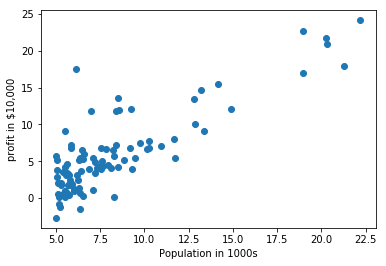

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df=pd.read_csv("reg.csv")
df=df.loc[:,{'Population','Profit'}]
plt.scatter(df.Population,df.Profit)
plt.xlabel('Population in 1000s')
plt.ylabel('profit in $10,000')
plt.show()


In [2]:
import numpy as np

In [3]:
population_array=df.Population.as_matrix().reshape(97,1)
profit_array=df.Profit.as_matrix().reshape(97,1)


In [31]:
X_data=np.column_stack((np.ones_like(population_array),population_array))


In [30]:
theta=np.zeros((2,1))

# Cost computation using ordinary least squared method

In [6]:
def computeCost(X,Y,theta):
    return (1.0/(2*len(X)))*np.sum(np.power(np.dot(X,theta)-Y,2))
computeCost(X_data,profit_array,theta)

32.072733877455676

In [7]:

y_estimate=np.dot(X_data,theta).flatten()
y_estimate.shape
x=profit_array.flatten()-y_estimate
x.shape


(97,)

In [24]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = len(y) # number of training examples
    
    cost=[]
    numIter=[]
    for i in range(num_iters):
        y_estimate=np.dot(X,theta)
        
        error=y_estimate-y
       
        theta=theta-alpha*(1.0/m)*np.dot(X.T,error)
        numIter.append(i)
        cost.append(computeCost(X,y,theta))
 
    return (theta,cost,numIter)    
    


    



In [27]:
print(x)   #printing the returned value of theta matrix


[[-3.53629894]
 [ 1.15691978]]


In [28]:
y_pred=x[0]+x[1]*7.0708        #predicting a value when population is given
print(y_pred)

[ 4.64404947]


# drawing a curve of cost function vs number of iterations

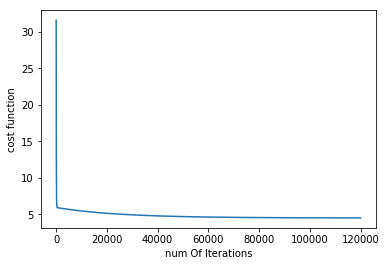

In [23]:
x,cost,numIter=gradientDescent(X_data,profit_array,theta,0.0001111,120000)
plt.plot(numIter,cost)
plt.xlabel('num Of Iterations')
plt.ylabel('cost function')
plt.show()


# The curve showing the best fit line

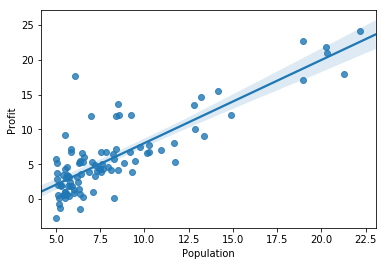

In [20]:
import seaborn as nsn
nsn.regplot(df.Population,df.Profit)
plt.show()